In [1508]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [1509]:
data = pd.read_csv("preprocessed_data.csv",encoding = 'ISO-8859-15')

In [1510]:
data.reset_index(inplace=False)

,index,Unnamed: 0,Priority,Summary,time
0,0,0,1,endpoint mapping and saxon,1
1,1,1,1,thread safe problem during wsdl generation,1
2,2,2,0,saajutils wrong way to detect saaj version,1
3,3,3,2,incorrect javadoc in org.springframework.ws.soap.soapfault,0
4,4,4,1,loading default key store overwrites truststore,0
...,...,...,...,...,...
21985,21985,22316,1,multi-dimensional array brakes http invokers remoting,0
21986,21986,22317,1,possible npe in jmsutils.buildexceptionmessage and jmsexception.getmessage,0
21987,21987,22318,1,throws clause ignored by pointcut parser,2
21988,21988,22319,2,can bind to generic attribute but not generic parameter,2


In [1511]:
data = data[['Priority','Summary','time']]

In [1512]:
data = data.dropna()

In [1513]:
n=2000

In [1514]:
data = data.head(n)

In [1515]:
X=data['Summary']
y = data[['time','Priority']]

In [1516]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=False)

In [1517]:
X_train

0                                                                                                      endpoint mapping and saxon
1                                                                                      thread safe problem during wsdl generation
2                                                                                      saajutils wrong way to detect saaj version
3                                                                      incorrect javadoc in org.springframework.ws.soap.soapfault
4                                                                                 loading default key store overwrites truststore
                                                                  ...                                                            
1395                                                               wrong 'expected-type' annotation for <aop:advisor>/@advice-ref
1396                                                                <context:component-sca

In [1518]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [1519]:
y_test['Priority'].value_counts()

1    374
2    192
0     34
Name: Priority, dtype: int64

In [1520]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w+')

#vect = CountVectorizer(analyzer='word', token_pattern=r'\w+')



In [1521]:
X_train.index

RangeIndex(start=0, stop=1400, step=1)

In [1522]:
y_train.index

RangeIndex(start=0, stop=1400, step=1)

In [1523]:
y_train['time'].value_counts()

0    870
1    390
2    140
Name: time, dtype: int64

In [1524]:
X_test

0                                                                                                   <context:component-scan> classloader problem
1                                                                                    npe in abstractbeanfactory#getbean(string, class, object[])
2                                 org.springframework.jdbc.core.simple.parameterizedbeanpropertyrowmapper does not support inheritance (extends)
3                                                                   example in "extensible xml authoring" section uses namespaces inconsistently
4                                       using aop:scoped-proxy introduces unwanted extra autowire candidate even with autowire-candidate="false"
                                                                         ...                                                                    
595    mbeanexporter.autodetect can detect only one of several equal beans (beans whose equals method returns true at the time of 

In [1525]:
X_train.isna().any().sum()

0

In [1526]:
pd.set_option('display.max_colwidth', None)

In [1527]:
z = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [1528]:
z.shape

(1400, 2843)

In [1529]:
z = pd.DataFrame.sparse.from_spmatrix(z)

In [1530]:
correct = pd.merge(z, y_train, left_index=True, right_index=True)

In [1531]:
list_hi = correct.columns.to_list()

In [1532]:
list_hi.remove('time')

In [1533]:
correct[list_hi] 

,0,1,2,3,4,5,6,7,8,9,...,2834,2835,2836,2837,2838,2839,2840,2841,2842,Priority
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [1534]:
correct['time'].value_counts()

0    870
1    390
2    140
Name: time, dtype: int64

In [1535]:
type(correct['time'])

pandas.core.series.Series

In [1536]:
correct['time']

0       1
1       1
2       1
3       0
4       0
       ..
1395    0
1396    0
1397    0
1398    1
1399    0
Name: time, Length: 1400, dtype: int64

In [1537]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
#from imblearn.over_sampling import ADASYN
#from imblearn.over_sampling import SMOTENC
#oversample = BorderlineSMOTE()
#oversample = SMOTE()
#oversample = RandomOverSampler(random_state=42)
#from imblearn.over_sampling import KMeansSMOTE
#oversample = KMeansSMOTE(random_state=42)
from imblearn.over_sampling import SVMSMOTE
oversample =   SVMSMOTE(random_state=42)
#oversample =   ADASYN(random_state=42)
#oversample =   SMOTENC(random_state=42,categorical_features=3398)
X, y = oversample.fit_resample(correct[list_hi] , correct['time'])

C:\Users\sm185567\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:516: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [1538]:
y.value_counts()

0    870
1    870
2    505
Name: time, dtype: int64

In [1539]:
X['Priority'].value_counts()

1    1420
2     625
0     200
Name: Priority, dtype: int64

In [1540]:
samo = pd.merge(X, y, left_index=True, right_index=True)

In [1541]:
samo

,0,1,2,3,4,5,6,7,8,9,...,2835,2836,2837,2838,2839,2840,2841,2842,Priority,time
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2240,0.0,0.0,0.0,0.030810,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
2241,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
2242,0.0,0.0,0.0,0.142067,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
2243,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2


In [1542]:
list_hi = samo.columns.to_list()
list_hi.remove('Priority')

In [1543]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTENC
#oversample = SMOTE()
#oversample = RandomOverSampler(random_state=42)
#oversample = BorderlineSMOTE()
from imblearn.over_sampling import KMeansSMOTE
#oversample = KMeansSMOTE(random_state=42)
oversample =   SVMSMOTE(random_state=42)
#oversample =   ADASYN(random_state=42)
#oversample =   SMOTENC(random_state=42,categorical_features=[1])
X, y = oversample.fit_resample(samo[list_hi] , samo['Priority'])

C:\Users\sm185567\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:516: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [1544]:
samo = pd.merge(X, y, left_index=True, right_index=True)

In [1545]:
type(samo['time'])

pandas.core.series.Series

In [1546]:
list_hi = samo.columns.to_list()
list_hi.remove('Priority')
list_hi.remove('time')
x_data = samo[list_hi]

In [1547]:
samo['time'].value_counts()

1    1522
0    1473
2    1265
Name: time, dtype: int64

In [1548]:
y_data = samo[['Priority','time']]

In [1549]:
x_data

,0,1,2,3,4,5,6,7,8,9,...,2833,2834,2835,2836,2837,2838,2839,2840,2841,2842
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4255,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4256,0.0,0.0,0.0,0.001657,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4257,0.0,0.0,0.0,0.154898,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4258,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1550]:
no_of_col = x_data.shape[1]

In [1551]:
X_test

<600x2843 sparse matrix of type '<class 'numpy.float64'>'
	with 4457 stored elements in Compressed Sparse Row format>

# Model building

In [1552]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_data, y_data)

# predict
predictions = classifier.predict(X_test)
    # training performance
#training_predictions = classifier.predict(np.array(x_data))


In [1553]:
y_data['time'].ndim 

1

In [1554]:
meta = pd.DataFrame.sparse.from_spmatrix(predictions)
train_pred = pd.DataFrame.sparse.from_spmatrix(training_predictions)

In [1555]:
meta.shape,y_test.shape

((600, 2), (600, 2))

In [1556]:
y_test['Priority'].value_counts()

1    374
2    192
0     34
Name: Priority, dtype: int64

In [1557]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test['Priority'],meta[0])

0.5416666666666666

In [1558]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test['time'],meta[1])

0.48

In [1559]:
y_test['Priority'].value_counts()

1    374
2    192
0     34
Name: Priority, dtype: int64

In [1560]:
BR = accuracy_score(y_test['time'],meta[1]),accuracy_score(y_test['Priority'],meta[0])

In [1561]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test['Priority'], meta[0]))
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("Classification Report: \n", classification_report(y_test['time'], meta[1]))

Classification Report: 
               precision    recall  f1-score   support

           0       0.06      0.09      0.07        34
           1       0.67      0.66      0.66       374
           2       0.42      0.39      0.41       192

    accuracy                           0.54       600
   macro avg       0.38      0.38      0.38       600
weighted avg       0.55      0.54      0.55       600

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.53      0.63       478
           1       0.16      0.40      0.23        88
           2       0.03      0.06      0.04        34

    accuracy                           0.48       600
   macro avg       0.33      0.33      0.30       600
weighted avg       0.65      0.48      0.54       600



In [1562]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
mcm = confusion_matrix(y_test['Priority'], meta[0], labels = [0,1,2])
mcm

array([[  3,  22,   9],
       [ 33, 247,  94],
       [ 16, 101,  75]], dtype=int64)

In [1563]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [1564]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression(max_iter=20000))

# Training logistic regression model on train data
classifier.fit(x_data, y_data)

# predict
predictions = classifier.predict(X_test)

Wall time: 9.13 s


In [1565]:
meta = pd.DataFrame.sparse.from_spmatrix(predictions)

In [1566]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test['Priority'],meta[0])

0.6366666666666667

In [1567]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test['Priority'], meta[0]))

Classification Report: 
               precision    recall  f1-score   support

           0       0.08      0.06      0.07        34
           1       0.69      0.80      0.74       374
           2       0.58      0.43      0.49       192

    accuracy                           0.64       600
   macro avg       0.45      0.43      0.43       600
weighted avg       0.62      0.64      0.62       600



In [1568]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test['time'],meta[1])

0.6516666666666666

In [1569]:
y_data

,Priority,time
0,1,1
1,1,1
2,0,1
3,2,0
4,1,0
...,...,...
4255,2,1
4256,2,1
4257,2,1
4258,2,2


In [1570]:
cc = accuracy_score(y_test['time'],meta[1]),accuracy_score(y_test['Priority'],meta[0])

In [1571]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test['time'], meta[1]))

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       478
           1       0.18      0.24      0.21        88
           2       0.06      0.06      0.06        34

    accuracy                           0.65       600
   macro avg       0.35      0.36      0.35       600
weighted avg       0.68      0.65      0.66       600



In [1572]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [1573]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression(max_iter=20000))

# train
classifier.fit(x_data, y_data)

# predict
predictions = classifier.predict(X_test)


Wall time: 5.07 s


In [1574]:
meta = pd.DataFrame.sparse.from_spmatrix(predictions)

In [1575]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test['Priority'],meta[0])

0.61

In [1576]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test['Priority'], meta[0]))

Classification Report: 
               precision    recall  f1-score   support

           0       0.09      0.03      0.04        34
           1       0.62      0.98      0.76       374
           2       0.00      0.00      0.00       192

    accuracy                           0.61       600
   macro avg       0.24      0.34      0.27       600
weighted avg       0.39      0.61      0.48       600



C:\Users\sm185567\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sm185567\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sm185567\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [1577]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test['time'],meta[1])

0.55

In [1578]:
lp = accuracy_score(y_test['time'],meta[1]),accuracy_score(y_test['Priority'],meta[0])

In [1579]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test['time'], meta[1]))

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.60      0.69       478
           1       0.18      0.51      0.26        88
           2       0.00      0.00      0.00        34

    accuracy                           0.55       600
   macro avg       0.33      0.37      0.32       600
weighted avg       0.68      0.55      0.59       600



C:\Users\sm185567\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sm185567\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sm185567\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

# PCA 

In [1580]:
x_data

,0,1,2,3,4,5,6,7,8,9,...,2833,2834,2835,2836,2837,2838,2839,2840,2841,2842
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4255,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4256,0.0,0.0,0.0,0.001657,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4257,0.0,0.0,0.0,0.154898,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4258,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1581]:
from sklearn.decomposition import PCA

In [1582]:
pca = PCA(random_state=42)

In [1583]:
import numpy as np

In [1584]:
pca.fit(np.array(x_data) )

PCA(random_state=42)

In [1585]:
pca.components_

array([[-5.87945322e-04, -5.39102643e-04, -1.83742312e-03, ...,
        -3.23248459e-04, -3.23248459e-04, -2.80549557e-04],
       [-3.54131186e-04, -1.53673278e-03, -1.38587665e-03, ...,
        -2.80247716e-04, -2.80247716e-04,  9.90909076e-04],
       [-6.41026522e-04, -1.42843567e-03,  5.68219004e-04, ...,
         1.20527658e-04,  1.20527658e-04,  9.70555542e-05],
       ...,
       [-0.00000000e+00,  1.53272848e-03, -9.23547522e-05, ...,
         4.48865385e-03, -3.53601836e-03,  5.29471333e-03],
       [ 0.00000000e+00,  9.32616635e-04, -3.23576459e-05, ...,
         2.24504811e-03, -6.75842666e-04, -1.51293234e-03],
       [-0.00000000e+00, -3.41284714e-04,  1.26495893e-06, ...,
        -1.11168347e-03,  2.64186710e-04, -1.46087720e-03]])

In [1586]:
pca.explained_variance_ratio_

array([2.45086688e-02, 2.00586119e-02, 1.54617499e-02, ...,
       6.14434780e-38, 2.45144472e-38, 3.56992111e-39])

In [1587]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

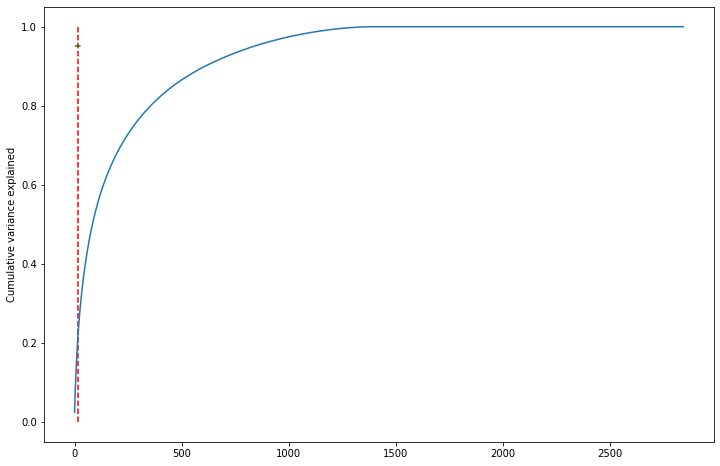

In [1588]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [1589]:
from sklearn.decomposition import IncrementalPCA

In [1612]:
no_of_col_pca = 1200

In [1613]:
pca_final = IncrementalPCA(n_components=no_of_col_pca)

In [1614]:
df_train_pca = pca_final.fit_transform(np.array(x_data))

In [1615]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(600, 1200)

# Model building 2 

In [1616]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(df_train_pca, y_data)

# predict
predictions = classifier.predict(df_test_pca)

In [1617]:
meta = pd.DataFrame.sparse.from_spmatrix(predictions)

In [1618]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test['Priority'],meta[0])

0.6266666666666667

In [1619]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test['time'],meta[1])

0.74

In [1620]:
binaryrelevance_pca = accuracy_score(y_test['time'],meta[1]),accuracy_score(y_test['Priority'],meta[0])

In [1621]:
%%time
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression(max_iter=20000))

# Training logistic regression model on train data
classifier.fit(df_train_pca, y_data)

# predict
predictions = classifier.predict(df_test_pca)

Wall time: 3.85 s


In [1622]:
meta = pd.DataFrame.sparse.from_spmatrix(predictions)

In [1623]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test['Priority'],meta[0])

0.63

In [1624]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test['time'],meta[1])

0.6416666666666667

In [1625]:
classifier_chains_pca = accuracy_score(y_test['time'],meta[1]),accuracy_score(y_test['Priority'],meta[0])

In [1626]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [1627]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression(max_iter=20000))

# train
classifier.fit(df_train_pca, y_data)

# predict
predictions = classifier.predict(df_test_pca)


Wall time: 1.54 s


In [1628]:
meta = pd.DataFrame.sparse.from_spmatrix(predictions)

In [1629]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test['Priority'],meta[0])

0.6083333333333333

In [1630]:
from sklearn.metrics import accuracy_score
labelpowerset_pca = accuracy_score(y_test['time'],meta[1]),accuracy_score(y_test['Priority'],meta[0])

In [1631]:
labelpowerset_pca

(0.555, 0.6083333333333333)

In [1632]:
"sample -"+str(n)+"+++"+"accuarcy of br -"+str(BR)+"+++"+"accuarcy of cc -"+str(cc)+"+++"+"accuarcy of lp -"+str(lp)+"+++"+"accuarcy of binaryrelevance_pca -"+str(binaryrelevance_pca)+"+++"+"accuarcy of classifier_chains_pca -"+str(classifier_chains_pca)+"+++"+"accuarcy of labelpowerset_pca -"+str(labelpowerset_pca)

'sample -2000+++accuarcy of br -(0.48, 0.5416666666666666)+++accuarcy of cc -(0.6516666666666666, 0.6366666666666667)+++accuarcy of lp -(0.55, 0.61)+++accuarcy of binaryrelevance_pca -(0.74, 0.6266666666666667)+++accuarcy of classifier_chains_pca -(0.6416666666666667, 0.63)+++accuarcy of labelpowerset_pca -(0.555, 0.6083333333333333)'

In [1611]:
with open('maxfeature2921.txt', 'a') as f:
    f.writelines("\n sample -"+str(n)+","+"no of columns-"+str(no_of_col)+","+"accuarcy of br -"+str(BR)+","+"accuarcy of cc -"+str(cc)+","+"accuarcy of lp -"+str(lp)+","+"no of columns-"+str(no_of_col_pca)+","+"accuarcy of binaryrelevance_pca -"+str(binaryrelevance_pca)+","+"accuarcy of classifier_chains_pca -"+str(classifier_chains_pca)+","+"accuarcy of labelpowerset_pca -"+str(labelpowerset_pca))